# Introducción

El presente documento tiene como principal objetivo construir una red neuronal de clasificación binaria para predecir el cancer de seno usando los datos [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). En este documento se presenta inicialmente una exploración de los datos y analisis de los mismos, al final se desarrollara el módelo de red neuronal de clasificación binaria para predecir el cancer de seno.

Inicialmente se lee el dataset.

In [1]:
import pandas as pd
data = pd.read_csv('./data.csv')

Ahora se observa superficialmente el contenido del dataset, se observa que el archivo contiene 33 columnas (33 posibles variables). La columna `id` no sigue una secuencia por lo cual no es muy util para el modelo final. La columna `diagnosis` es la columna que nos da la información de si esa fila corresponde al diagnóstico donde 'B' significa tumor benigno y 'M' tumor maligno. La última columna `Unnamed: 32` solo tiene valores "NaN" por lo cual no es útil.

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Se eliminan las columnas `id` y `diagnosis`

In [4]:
data = data.drop(['id', 'Unnamed: 32'],axis = 1 )
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Se observa la cantidad de diagnósticos para tumores malignos y benignos.

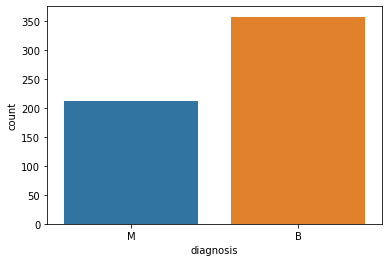

In [5]:
import seaborn as sns
ax = sns.countplot(x = data['diagnosis'],label="Count")


In [6]:
benigno, maligno = data['diagnosis'].value_counts()
print('Número de diagnósticos con tumor maligno: ', maligno)
print('Número de diagnósticos con tumor benigno: ', benigno)

Número de diagnósticos con tumor maligno:  212
Número de diagnósticos con tumor benigno:  357


Cambiar valores `M` y `B` por 1 y 0 respectivamente.

In [7]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Descripción general de las variables:

In [8]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Ahora se van a gráficar los histogramas de los valores que representan una media, y serán estas variables las que se tendrán en cuenta ya que las otras columnas (se - standard error y worst - valor mas alto de las medias) no son útiles en este caso. Estos histogramas se contrastaran respecto a los valores correspondientes de tumores malignos y benignos.

Columnas con valores que representan medias.

In [10]:
features_mean=list(data.columns[1:11])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

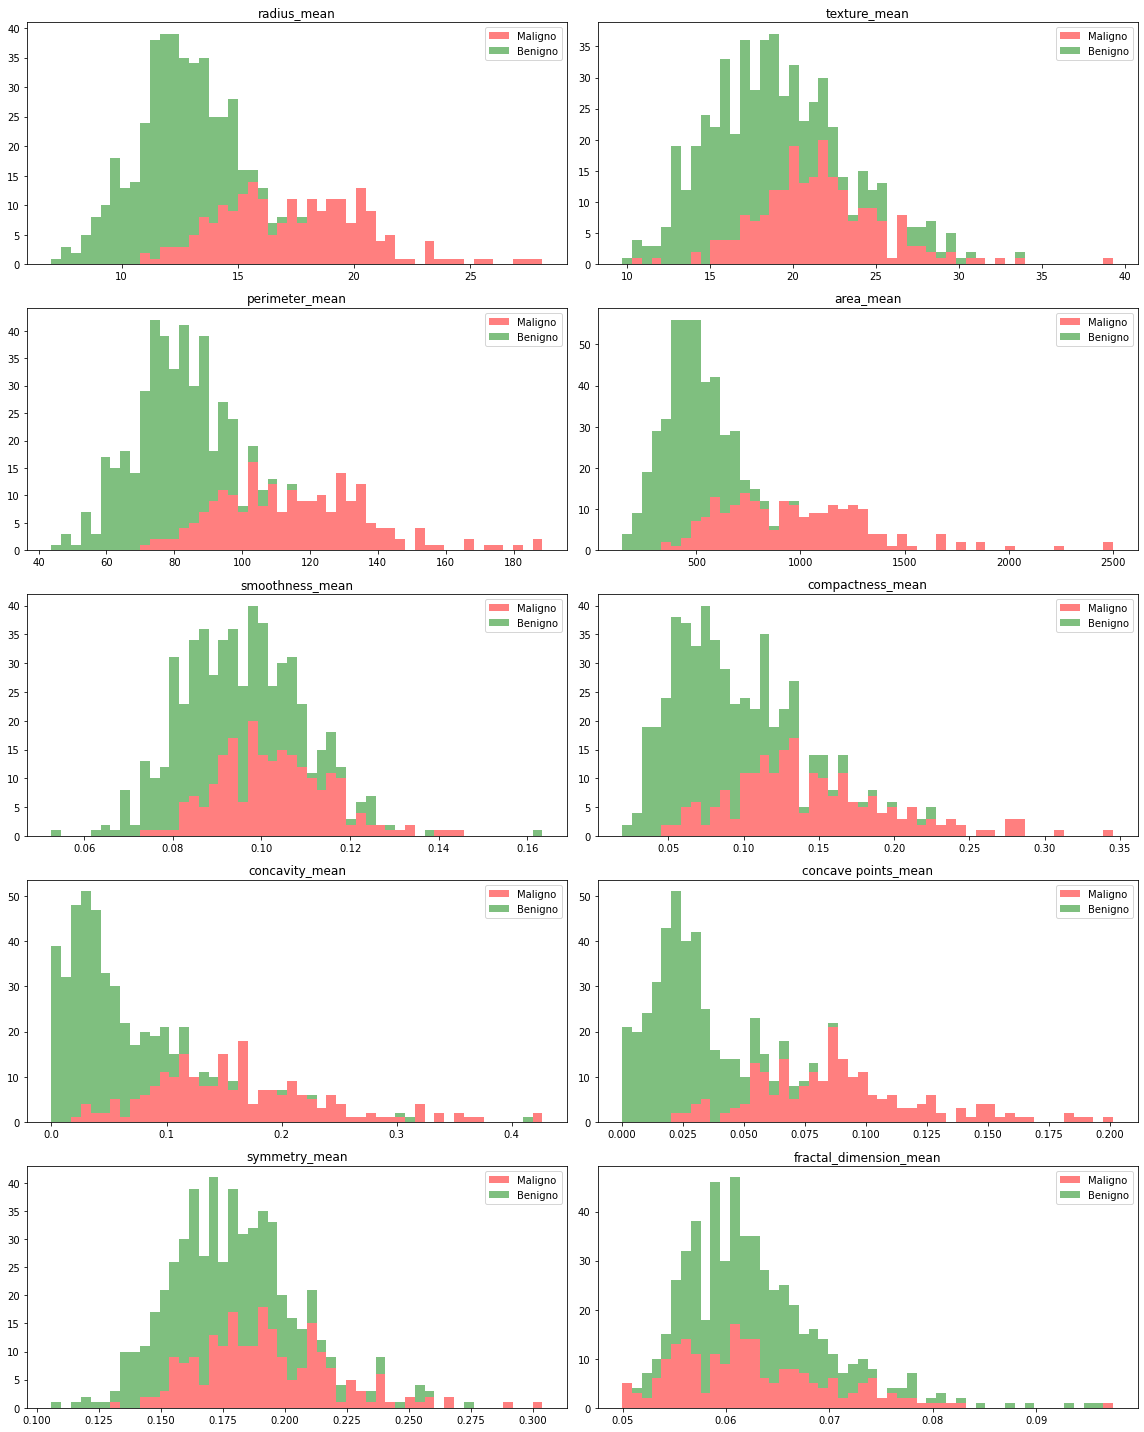

In [11]:
import matplotlib.pyplot as plt
import numpy as np

malign = data[data['diagnosis'] == 1]
benign = data[data['diagnosis'] == 0]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,20))
axes = axes.ravel()
for index,axe in enumerate(axes):
    axe.hist([malign[features_mean[index]],benign[features_mean[index]]],bins=50, alpha=0.5, stacked=True, label=['Maligno','Benigno'],color=['r','g'])
    axe.legend(loc='upper right')
    axe.set_title(features_mean[index])
plt.tight_layout()
plt.show()
    

De acuerdo a los histogramas anteriores, se pueden observar los siguientes comportamientos:

1. Las columnas de `radius`, `perimeter`, `area`, `compactness`, `concavity` y `concave points` presentan valores altos en los datos correspondientes a tumores malignos, por lo cual son útiles para el modelo.

2. Las columnas de `texture`, `smoothness`, `symmetry` y `fractal_dimension` presentan datos muy parecidos tanto para tumores malignos como para tumores benignos por lo cual no resultan muy útiles para el modelo.

Ahora se va analizar la correlación entre las variables mediante un mapa de calor

<AxesSubplot:>

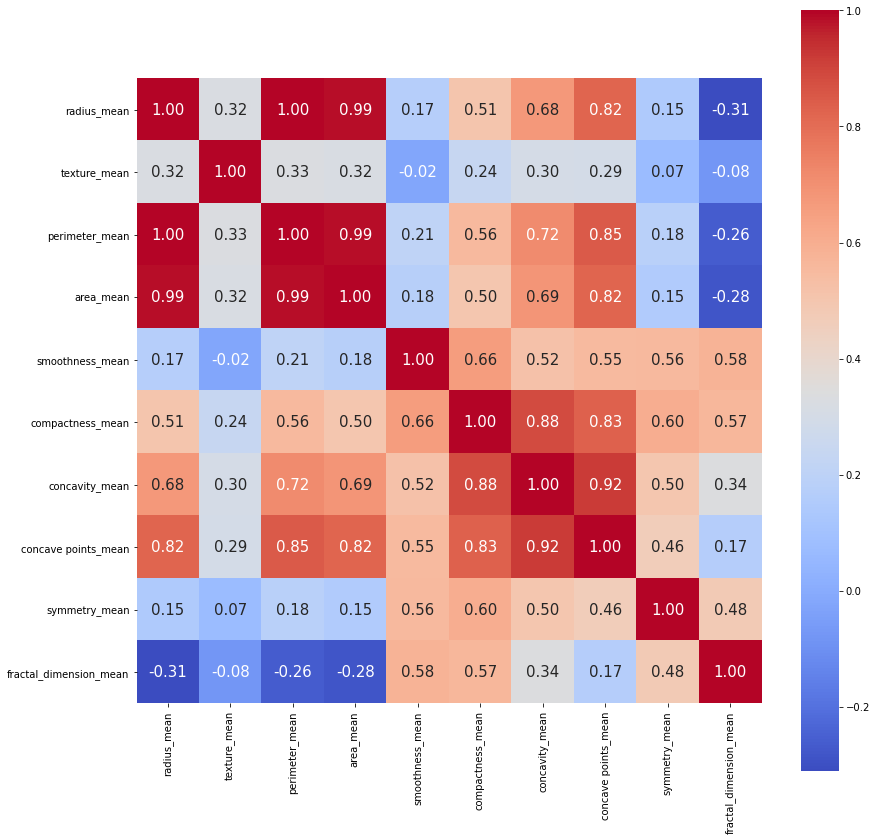

In [12]:
correlation = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

Con relación a este mapa de calor se observa una alta correlación entre algunas variables por lo cual esas correlaciones se dejará solamente una de las variables de la siguiente manera:

1. Las columnas de `radius`, `perimeter` y `area` presentan una alta correlación.

2. Las columnas de `compactness`, `concavity` y `concave points` presentan una alta correlación.

3. Se seleccionan las columnas de `radius` y `compactness` dado que de los dos grupos de variables correlacionadas, estas 2 variables son las que menos correlación tienen.

In [13]:
prediction_var = ['area_mean','compactness_mean']

<br>
Ahora se dividen los datos para entrenamiento y pruebas.

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3)

train_x = train[prediction_var] 
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis 

<br>
Normalización de los datos para mejorar los resultados del modelo.

In [15]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

train_x = MinMaxScaler().fit_transform(train_x)
print("Datos entrenamiento:", train_x.shape)

test_x = MinMaxScaler().fit_transform(test_x)
print("Datos pruebas:", test_x.shape)

Datos entrenamiento: (398, 2)
Datos pruebas: (171, 2)


<br><br>
El modelo que se va plantear a continuación se desarrollo usando como base otros [cuadernos de Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/code) y los cuadernos de clase, adicionalmente los parámetros se ajustaron mediante ensayo y error.

In [37]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation
from tensorflow.keras.utils import plot_model

In [38]:
model = keras.Sequential([
    Dense(8, activation='relu', input_shape=(train_x.shape[1],)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


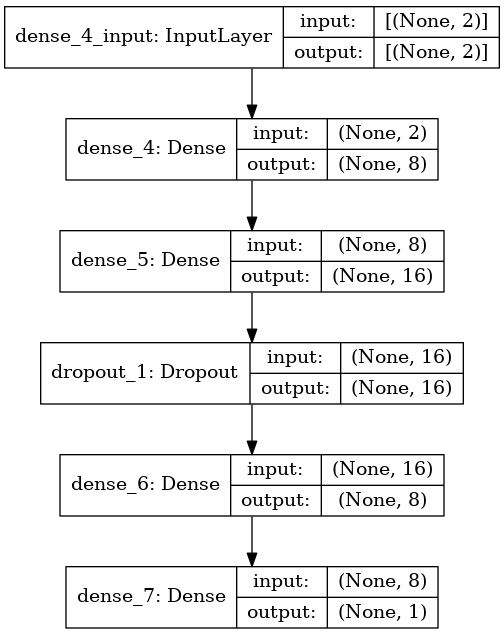

In [39]:
model.summary()
plot_model(model, to_file='./img/cancer.png', 
           show_shapes=True)

In [40]:
from tensorflow.keras. metrics import Precision, Recall
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[Precision(name="precision"),'accuracy'])

In [41]:
history = model.fit(
    train_x,
    train_y,
    batch_size=128,
    epochs=150,
    verbose=2,
    validation_data=(test_x, test_y)
)

Epoch 1/150
4/4 - 2s - loss: 0.6932 - precision: 0.4717 - accuracy: 0.6281 - val_loss: 0.6945 - val_precision: 0.0000e+00 - val_accuracy: 0.6082
Epoch 2/150
4/4 - 0s - loss: 0.6909 - precision: 0.7241 - accuracy: 0.6683 - val_loss: 0.6926 - val_precision: 0.0000e+00 - val_accuracy: 0.6082
Epoch 3/150
4/4 - 0s - loss: 0.6894 - precision: 0.8824 - accuracy: 0.6683 - val_loss: 0.6909 - val_precision: 1.0000 - val_accuracy: 0.6140
Epoch 4/150
4/4 - 0s - loss: 0.6883 - precision: 1.0000 - accuracy: 0.6683 - val_loss: 0.6892 - val_precision: 1.0000 - val_accuracy: 0.6140
Epoch 5/150
4/4 - 0s - loss: 0.6867 - precision: 1.0000 - accuracy: 0.6583 - val_loss: 0.6874 - val_precision: 1.0000 - val_accuracy: 0.6140
Epoch 6/150
4/4 - 0s - loss: 0.6848 - precision: 1.0000 - accuracy: 0.6583 - val_loss: 0.6856 - val_precision: 1.0000 - val_accuracy: 0.6199
Epoch 7/150
4/4 - 0s - loss: 0.6819 - precision: 0.9333 - accuracy: 0.6683 - val_loss: 0.6838 - val_precision: 1.0000 - val_accuracy: 0.6257
Epoch

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist


,loss,precision,accuracy,val_loss,val_precision,val_accuracy,epoch
0,0.693163,0.471698,0.628141,0.694515,0.000000,0.608187,0
1,0.690860,0.724138,0.668342,0.692641,0.000000,0.608187,1
2,0.689422,0.882353,0.668342,0.690940,1.000000,0.614035,2
3,0.688251,1.000000,0.668342,0.689189,1.000000,0.614035,3
4,0.686662,1.000000,0.658291,0.687443,1.000000,0.614035,4
...,...,...,...,...,...,...,...
145,0.240020,0.877863,0.884422,0.193304,0.907692,0.918129,145
146,0.226005,0.900000,0.896985,0.194879,0.895522,0.918129,146
147,0.225738,0.905109,0.914573,0.199151,0.885714,0.923977,147
148,0.240670,0.877698,0.899498,0.204625,0.876712,0.929825,148


El parámetro `epoch` se ajustó mediante ensayo y error tomando como referencia las siguientes gráficas, especialmente la gráfica de error en el entrenamiento que después de `epoch=100`, se observó que no habia mas perdida de error. 

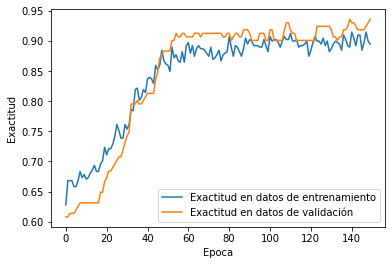

In [44]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud en datos de entrenamiento')
plt.plot(hist['epoch'], hist['val_accuracy'],
           label='Exactitud en datos de validación')
# plt.ylim([0.9,1])
plt.legend()
plt.show()

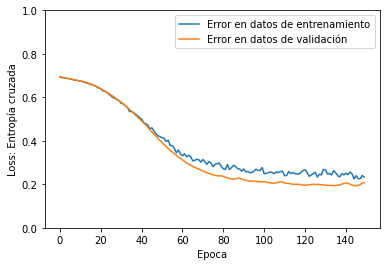

In [47]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en datos de entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en datos de validación')
plt.ylim([0,1])
plt.legend()
plt.show()

In [48]:
pred_y = model.predict(test_x)
pred_y = (pred_y > 0.5)
pred_test_y = model.predict(train_x)
pred_test_y = (pred_test_y > 0.5)

In [49]:
from sklearn import metrics

print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       104
           1       0.88      0.97      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [51]:
print("Exactitud del modelo sobre los datos de prueba: {0:0.3f}".format(metrics.accuracy_score(test_y, pred_y)))
print("Exactitud del modelo sobre los datos de entrenamiento: {0:0.3f}".format(metrics.accuracy_score(train_y, pred_test_y)))


Exactitud del modelo sobre los datos de prueba: 0.936
Exactitud del modelo sobre los datos de entrenamiento: 0.910


In [52]:
print("Precisión del modelo sobre los datos de prueba: {0:0.3f}".format(metrics.precision_score(test_y, pred_y)))
print("Precisión del modelo sobre los datos de entrenamiento: {0:0.3f}".format(metrics.precision_score(train_y, pred_test_y)))

Precisión del modelo sobre los datos de prueba: 0.878
Precisión del modelo sobre los datos de entrenamiento: 0.892
